Original Model for Classifying Flowers with Data Augmentation

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,585,989 (112.86 MB)

 Trainable params: 29,585,989 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.3452 - loss: 2.0135 - val_accuracy: 0.4414 - val_loss: 1.2891
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5034 - loss: 1.1956 - val_accuracy: 0.5886 - val_loss: 1.0993
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.5297 - loss: 1.1111 - val_accuracy: 0.6049 - val_loss: 1.0134
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.5823 - loss: 1.0396 - val_accuracy: 0.5831 - val_loss: 0.9769
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6037 - loss: 1.0092 - val_accuracy: 0.6512 - val_loss: 0.9069
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6414 - loss: 0.9400 - val_accuracy: 0.6649 - val_loss: 0.8808
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.6570 - loss: 0.8912 - val_accuracy: 0.6975 - val_loss: 0.8871
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.6684 - loss: 0.8789 - val_accur

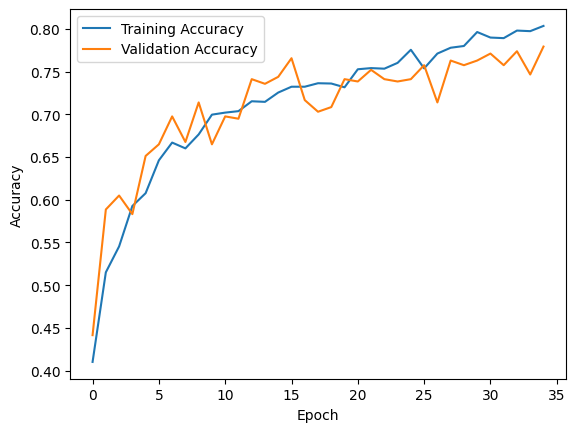

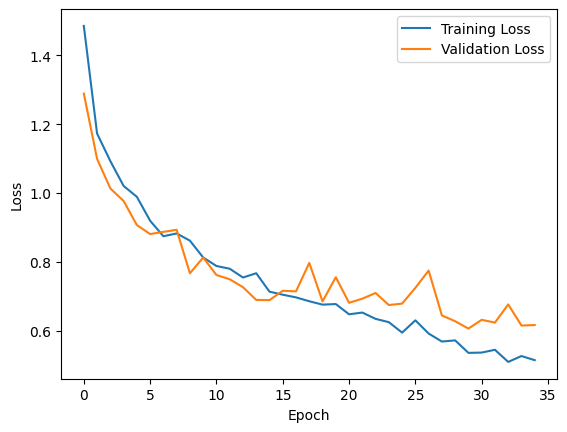

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7677 - loss: 0.6315
Test accuracy: 0.7901907563209534
Test loss: 0.5639525651931763


In [ ]:
# Import the flowers dataset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# Load dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Define the data augmentation layers
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Preprocessing for validation and test datasets
def preprocess(image, label):
    image = tf.image.resize(image, [256, 256])
    return image, label

# Dataset preparation
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
X = layers.Rescaling(1.0 / 255.0)(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss")
    ]
)

# Plot training and validation metrics
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Using VGGNet-16 as a Feature Extractor

In [ ]:
# https://keras.io/api/applications/

Number of classes: 5


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 224, 224, 3)    │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 25088)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 256)            │      6,422,784 │ flatten_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 256)            │              0 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 5)              │          1,285 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.5597 - loss: 10.9028 - val_accuracy: 0.7847 - val_loss: 0.7256
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.6989 - loss: 0.9636 - val_accuracy: 0.7929 - val_loss: 0.6006
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6907 - loss: 0.9726 - val_accuracy: 0.8093 - val_loss: 0.5774
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.7046 - loss: 0.9092 - val_accuracy: 0.8447 - val_loss: 0.6597
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.7205 - loss: 0.9304 - val_accuracy: 0.8011 - val_loss: 0.6685
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.7504 - loss: 0.7905 - val_accuracy: 0.8338 - val_loss: 0.7005
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.7412 - loss: 0.7510 - val_accuracy: 0.8174 - val_loss: 0.7641
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.7614 - loss: 0.6895 - val_acc

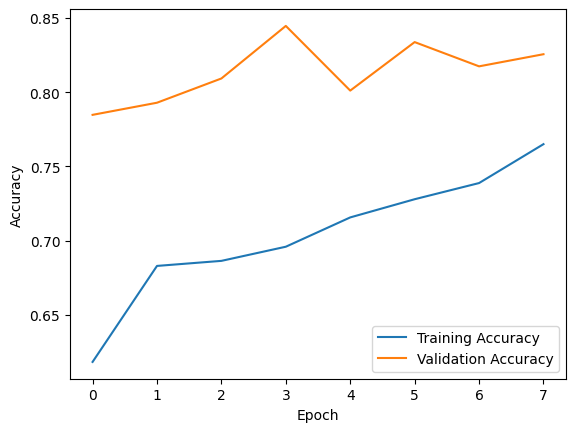

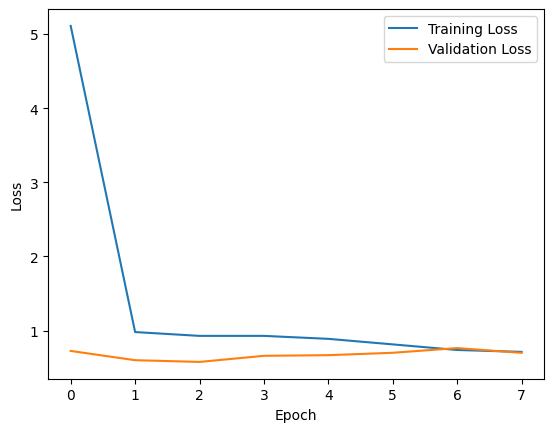

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8075 - loss: 0.7413
Test accuracy: 0.8092643022537231
Test loss: 0.661135196685791


In [ ]:
# Import the flowers dataset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

# Load dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

num_classes = metadata.features['label'].num_classes
print(f"Number of classes: {num_classes}")

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Preprocessing for validation and test datasets
def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    return image, label

# Dataset preparation
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

#bring in vgg16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
# freeze the weights so we dont mess them up
conv_base.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
# add vggnet preprocessing
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss")
    ]
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

## Fine Tuning

In [ ]:
# Fine-tuning step: Unfreeze part of the VGG16 base
conv_base.trainable = True
for layer in conv_base.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Use a smaller learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,  # Additional epochs for fine-tuning
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss")
    ]
)

# Evaluate the fine-tuned model
fine_tuned_test_loss, fine_tuned_test_acc = model.evaluate(test_ds)
print('Fine-tuned Test accuracy:', fine_tuned_test_acc)
print('Fine-tuned Test loss:', fine_tuned_test_loss)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 216ms/step - accuracy: 0.7213 - loss: 0.8536 - val_accuracy: 0.8283 - val_loss: 0.5618
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.7528 - loss: 0.6814 - val_accuracy: 0.8447 - val_loss: 0.5233
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.7989 - loss: 0.6155 - val_accuracy: 0.8529 - val_loss: 0.5223
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.8350 - loss: 0.4742 - val_accuracy: 0.8719 - val_loss: 0.5065
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.8214 - loss: 0.4595 - val_accuracy: 0.8692 - val_loss: 0.5045
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.8339 - loss: 0.4292 - val_accuracy: 0.8665 - val_loss: 0.4959
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.8674 - loss: 0.3735 - val_accuracy: 0.8828 - val_loss: 0.5068
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.8610 - loss: 0.3773 - val_accu

## Trying ResNet50

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,256,453 (187.90 MB)

 Trainable params: 25,691,653 (98.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 195ms/step - accuracy: 0.6192 - loss: 5.4309 - val_accuracy: 0.8093 - val_loss: 0.5310
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.7100 - loss: 0.8727 - val_accuracy: 0.8120 - val_loss: 0.4888
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.7541 - loss: 0.7022 - val_accuracy: 0.8719 - val_loss: 0.4076
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.7727 - loss: 0.6761 - val_accuracy: 0.8556 - val_loss: 0.4121
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.7862 - loss: 0.6390 - val_accuracy: 0.8420 - val_loss: 0.4811
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.7708 - loss: 0.6687 - val_accuracy: 0.8556 - val_loss: 0.4346
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.7842 - loss: 0.6063 - val_accuracy: 0.8556 - val_loss: 0.4598
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.7856 - loss: 0.6197 - val_accu

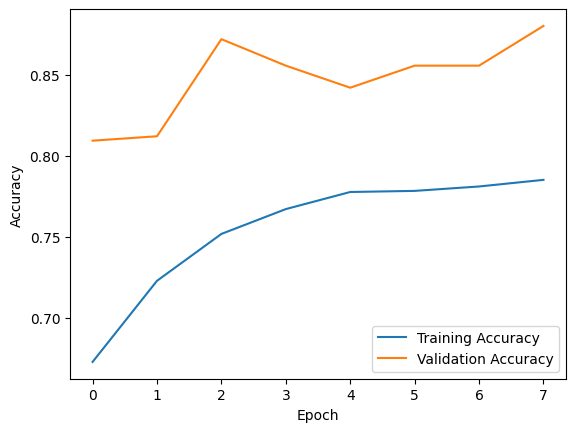

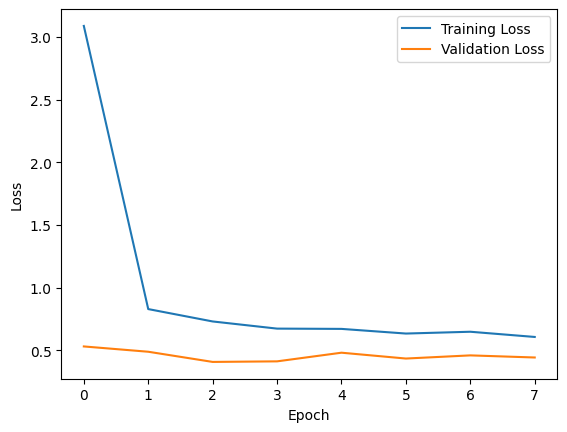

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8455 - loss: 0.5708
Test accuracy: 0.8474114537239075
Test loss: 0.5260269045829773


In [ ]:
# Import the flowers dataset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2

# Load dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Preprocessing for validation and test datasets
def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    return image, label

# Dataset preparation
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

#bring in resnet50
conv_base = ResNet50V2(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
# freeze the weights so we dont mess them up
conv_base.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
X = layers.Rescaling(1.0 / 255.0)(x)
x = conv_base(X)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss")
    ]
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)